In [21]:
import tensorflow as tf
from tensorflow.keras import layers, losses, datasets, Model
from load_oxford_flowers102 import load_oxford_flowers102
import matplotlib.pyplot as plt
import numpy as np

# Load Oxford Flowers dataset
train_data, validation_data, test_data, class_names = load_oxford_flowers102(imsize=96, fine=False)

y_hat_train = train_data["labels"]
y_hat_test = test_data["labels"]
x_train = train_data["images"]
x_test = test_data["images"]
x_valid = validation_data["images"]
y_hat_valid = validation_data["labels"]

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to include channel dimension
# x_train = tf.expand_dims(x_train, axis=-1)
# x_test = tf.expand_dims(x_test, axis=-1)

# Print dataset shapes
print(x_train.shape)
print(x_test.shape)


(1788, 96, 96, 3)
(320, 96, 96, 3)


: 

In [ ]:
class Autoencoder(Model):
    def __init__(self, latent_dim, input_shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=input_shape),
            layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
            layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
            layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
            layers.Conv2D(filters=4, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
            layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
            layers.Flatten(),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Reshape((12, 12, 4)),
            layers.Conv2D(filters=4, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
            layers.UpSampling2D(size=(2, 2)),
            layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
            layers.UpSampling2D(size=(2, 2)),
            layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
            layers.UpSampling2D(size=(2, 2)),
            layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), activation='sigmoid', padding='same'),
        ])
        self.encoder.summary()
        self.decoder.summary()

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

latent_dim = 64
shape = x_test.shape[1:]
autoencoder = Autoencoder(latent_dim, shape)

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [19]:
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                shuffle=True,
                validation_data=(x_test, x_test))


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0814 - val_loss: 0.0422
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0371 - val_loss: 0.0320
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0307 - val_loss: 0.0284
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 - val_loss: 0.0266
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0262 - val_loss: 0.0257
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0253 - val_loss: 0.0245
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0247 - val_loss: 0.0240
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0236 - val_loss: 0.0234
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 - val_loss: 0.0231
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0229 - val_loss: 0.0227
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0227 - val_loss: 0.0227
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0225 - val_loss: 0.0221

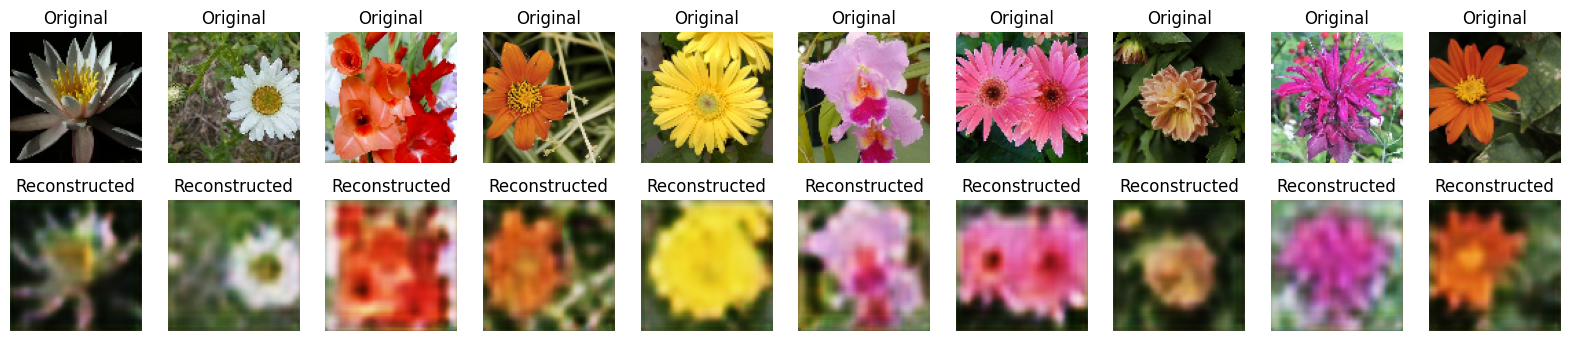

In [20]:
# Encoded and decoded images
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

# Plotting
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()
